## Compare LSTM and DCRNN 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('fivethirtyeight')

## Load DCRNN predictions

In [2]:
dcrnn_pred1 = pd.read_csv('../data/forecasting/users/_1.csv')
dcrnn_pred3 = pd.read_csv('../data/forecasting/users/_3.csv')
dcrnn_pred6 = pd.read_csv('../data/forecasting/users/_6.csv')
dcrnn_pred12 = pd.read_csv('../data/forecasting/users/_12.csv')

## Load LSTM Prediction

In [31]:
lstm_pred = pd.read_csv('../data/forecasting/users/lstm_prediction.csv')
lstm_pred['time_hour'] = pd.to_datetime(lstm_pred['time_hour'])

## Load DCRNN Y Test

In [4]:
y_test = pd.read_csv('../data/forecasting/users/_test.csv')
dataset_file = "../data/users.h5"
users_df = pd.read_hdf(dataset_file)
users_df = pd.DataFrame(users_df.to_records())
users_df = users_df

train_data_len = users_df.shape[0] - y_test.shape[0]

## Include time hour column to all predictions

In [5]:
time_hour = users_df[-y_test.shape[0]:]['time_hour'].values

dcrnn_pred1['time_hour'] = time_hour
dcrnn_pred3['time_hour'] = time_hour
dcrnn_pred6['time_hour'] = time_hour
dcrnn_pred12['time_hour'] = time_hour

y_test = y_test.to_numpy()

In [6]:
print(dcrnn_pred1.shape)
print(dcrnn_pred3.shape)
print(dcrnn_pred6.shape)
print(dcrnn_pred12.shape)
print(lstm_pred.shape)

(38, 401)
(38, 401)
(38, 401)
(38, 401)
(38, 401)


In [7]:
def evaluate_model(YPred, YTest):

    rmse = np.sqrt(np.mean(YPred - YTest)**2)
    
    return rmse

In [59]:
def plot_bs(bs):
    plt.figure(figsize=(20, 15))
    users_df.plot(x='time_hour', y=bs)

def plot_model(prediction, bs):
    plt.figure(figsize=(20, 15))
    plt.title('Model')
    ax = plt.gca()
    users_df[:train_data_len].plot(x='time_hour', y=bs, ax=ax)
    users_df[train_data_len:].plot(x='time_hour', y=bs, ax=ax)
    prediction.plot(x='time_hour', y=bs, ax=ax)
    plt.legend()

def plot_prediction(prediction, bs):
    plt.figure(figsize=(20, 15))
    plt.title('Model')
    ax = plt.gca()
    users_df[train_data_len:].plot(x='time_hour', y=bs, ax=ax)
    prediction.plot(x='time_hour', y=bs, ax=ax)
    plt.legend()

def plot_compare_models(lstm, dcrnn, bs):
    plt.figure(figsize=(20, 15))
    plt.title('Model')
    ax = plt.gca()
    users_df[:train_data_len].plot(x='time_hour', y=bs, ax=ax)
    users_df[train_data_len:].plot(x='time_hour', y=bs, ax=ax, label='original', color='blue', linestyle='dashed')
    lstm.plot(x='time_hour', y=bs, ax=ax, label='lstm', color='red',)
    dcrnn.plot(x='time_hour', y=bs, ax=ax, label='dcrnn', color='orange',)
    plt.legend()
    
def plot_compare_predictions(lstm, dcrnn, bs):
    plt.figure(figsize=(20, 15))
    plt.title('Model')
    ax = plt.gca()
    users_df[train_data_len:].plot(x='time_hour', y=bs, ax=ax, label='original', color='blue', linestyle='dashed')
    lstm.plot(x='time_hour', y=bs, ax=ax, label='lstm', color='red',)
    dcrnn.plot(x='time_hour', y=bs, ax=ax, label='dcrnn', color='orange',)
    plt.legend()

In [9]:
rmse1 = evaluate_model(dcrnn_pred1[dcrnn_pred1.columns[:-1]].to_numpy(), y_test)
rmse3 = evaluate_model(dcrnn_pred3[dcrnn_pred3.columns[:-1]].to_numpy(), y_test)
rmse6 = evaluate_model(dcrnn_pred6[dcrnn_pred6.columns[:-1]].to_numpy(), y_test)
rmse12 = evaluate_model(dcrnn_pred12[dcrnn_pred12.columns[:-1]].to_numpy(), y_test)

In [10]:
print("RMSE prediction 1:                            ", rmse1)
print("RMSE prediction 3:                            ", rmse3)
print("RMSE prediction 6:                            ", rmse6)
print("RMSE prediction 12:                           ", rmse12)

RMSE prediction 1:                             98.73734301504385
RMSE prediction 3:                             1595.580057524292
RMSE prediction 6:                             1839.766832761518
RMSE prediction 12:                            6703.75899974054


<Figure size 1440x1080 with 0 Axes>

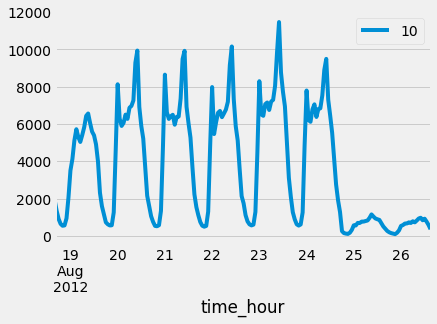

In [62]:
bs = "10"
plot_bs(bs)

## Compare DCRNN with original data

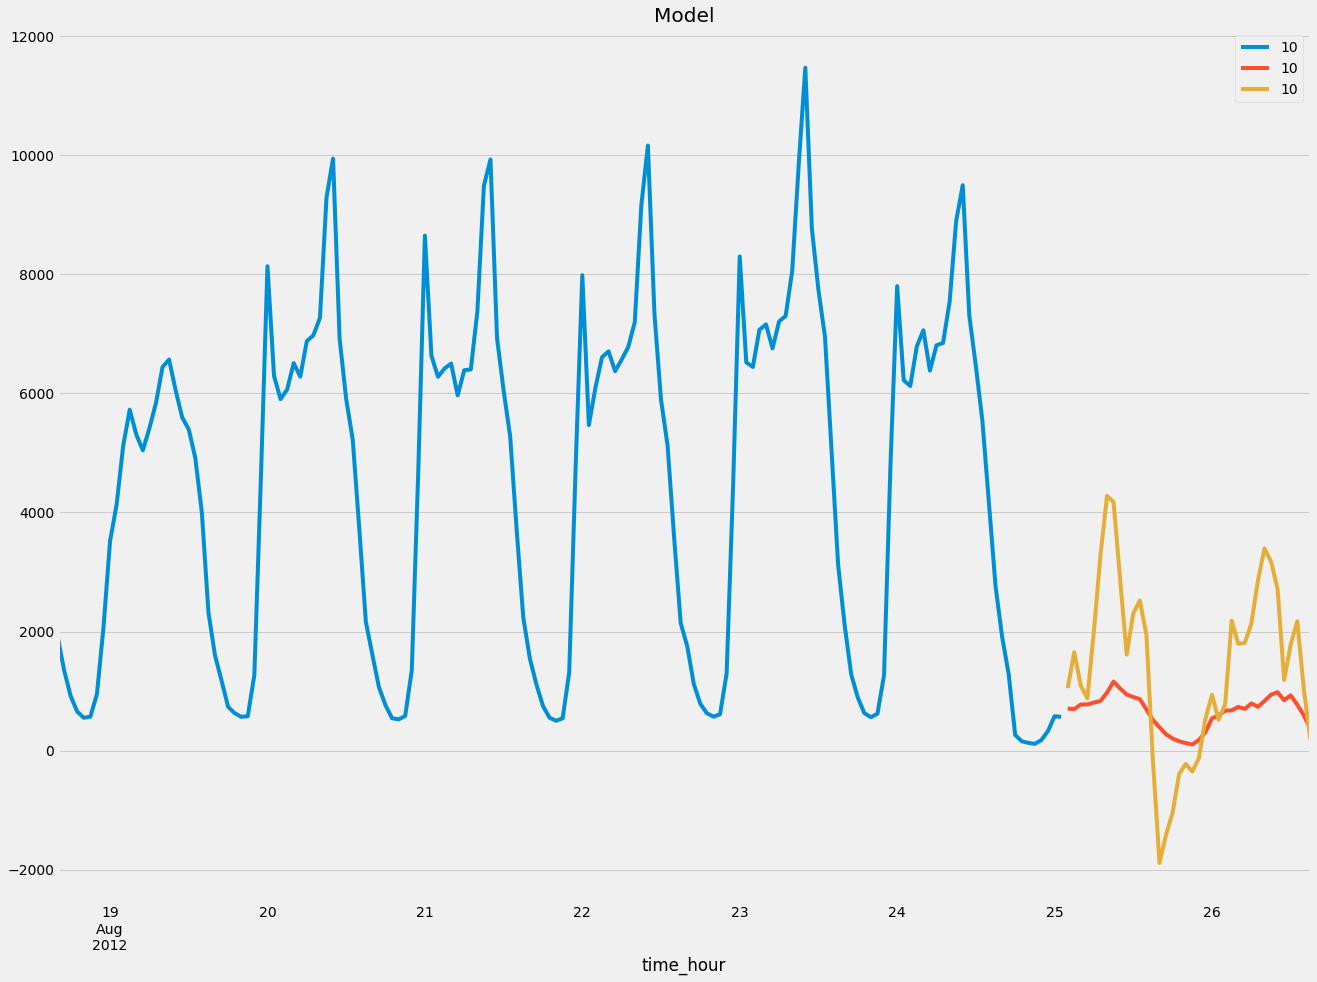

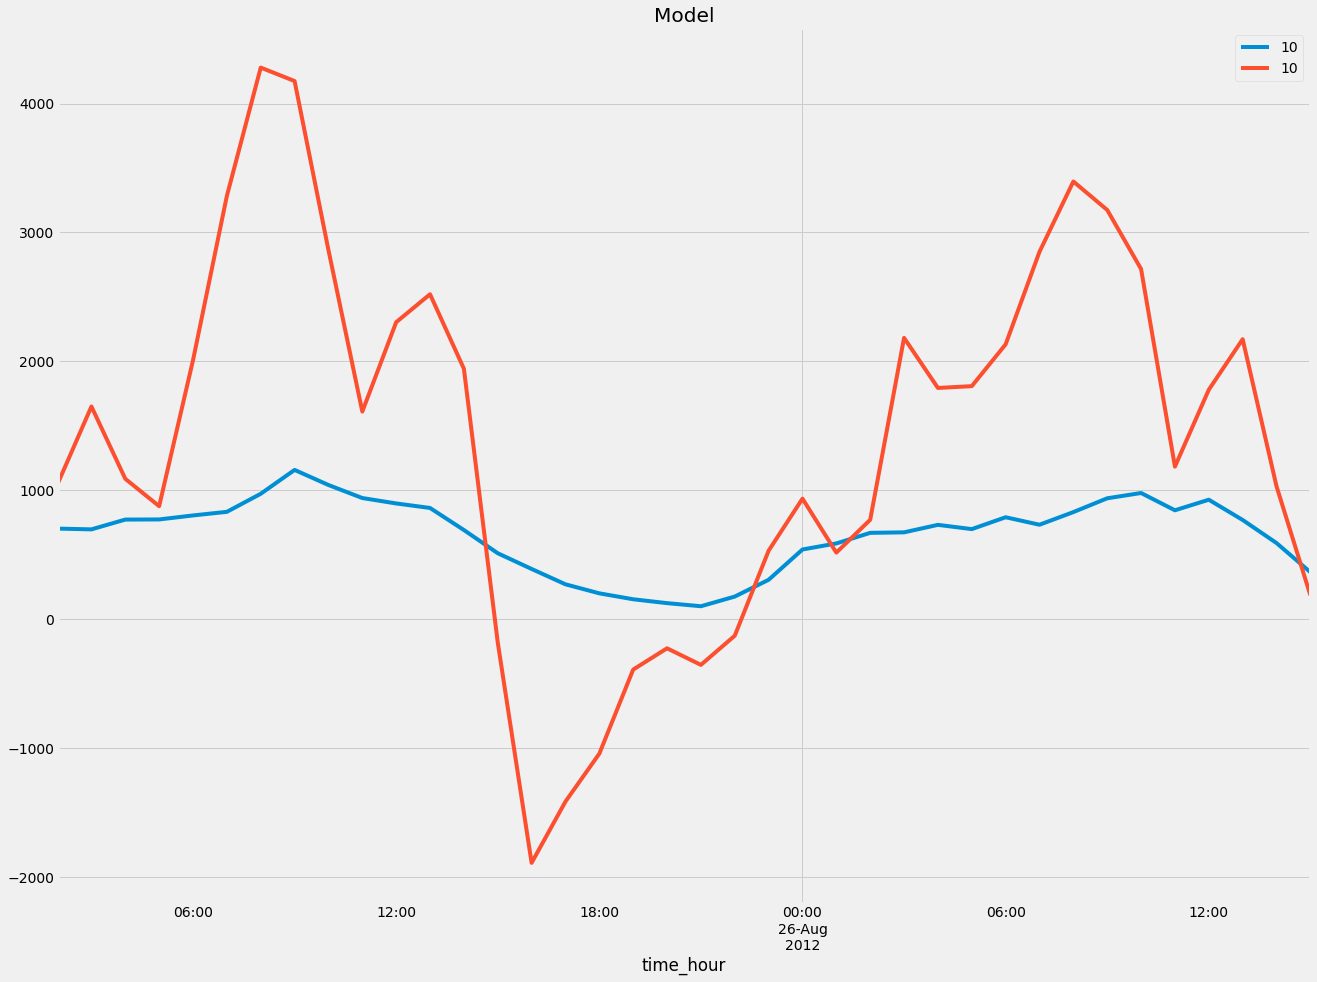

In [63]:
plot_model(dcrnn_pred1, bs)
plot_prediction(dcrnn_pred1, bs)

## Compare LSTM with original data

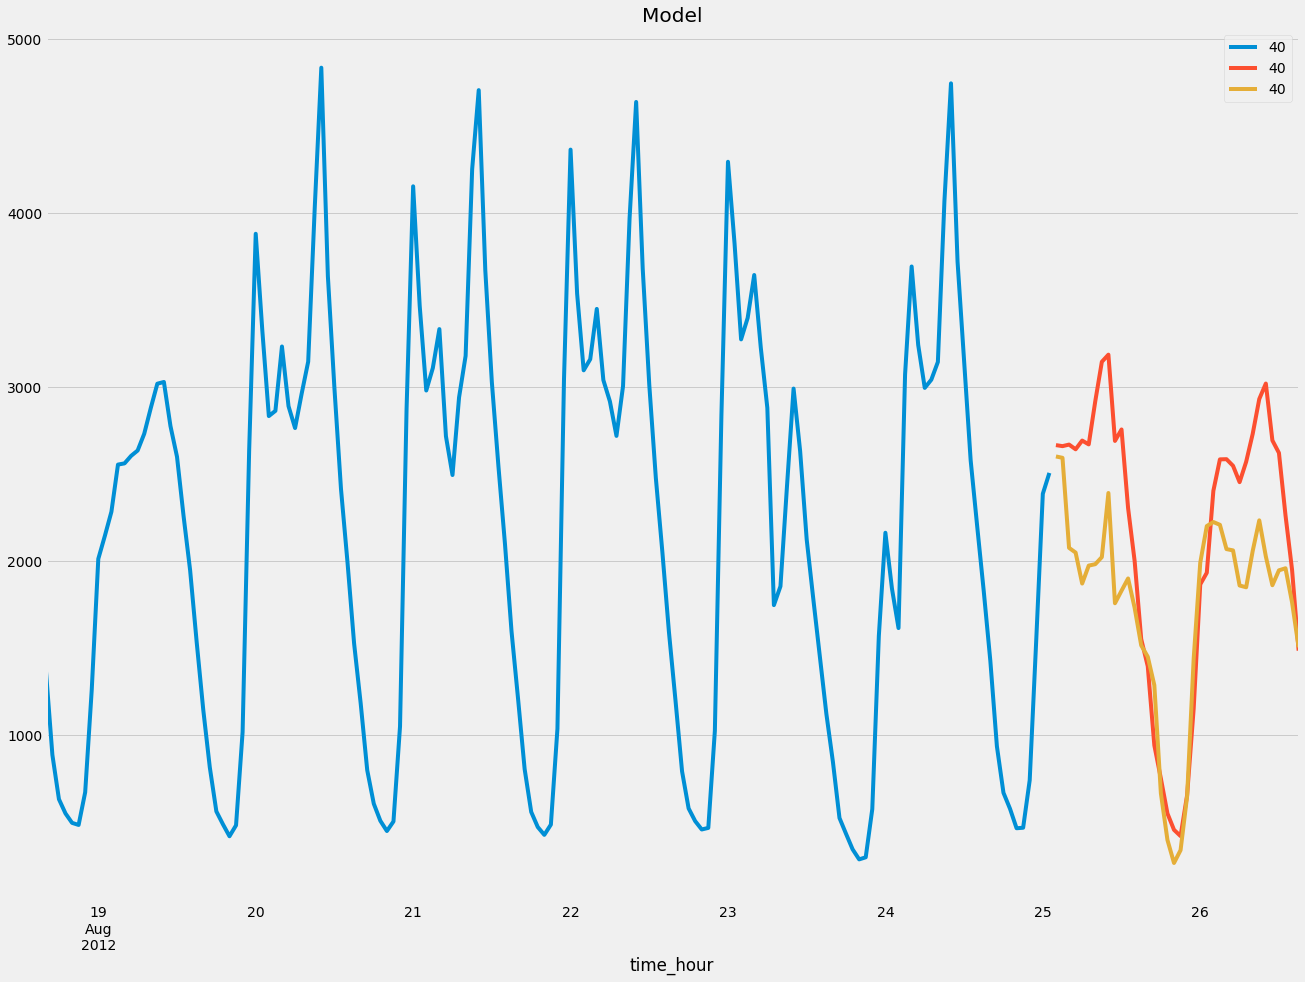

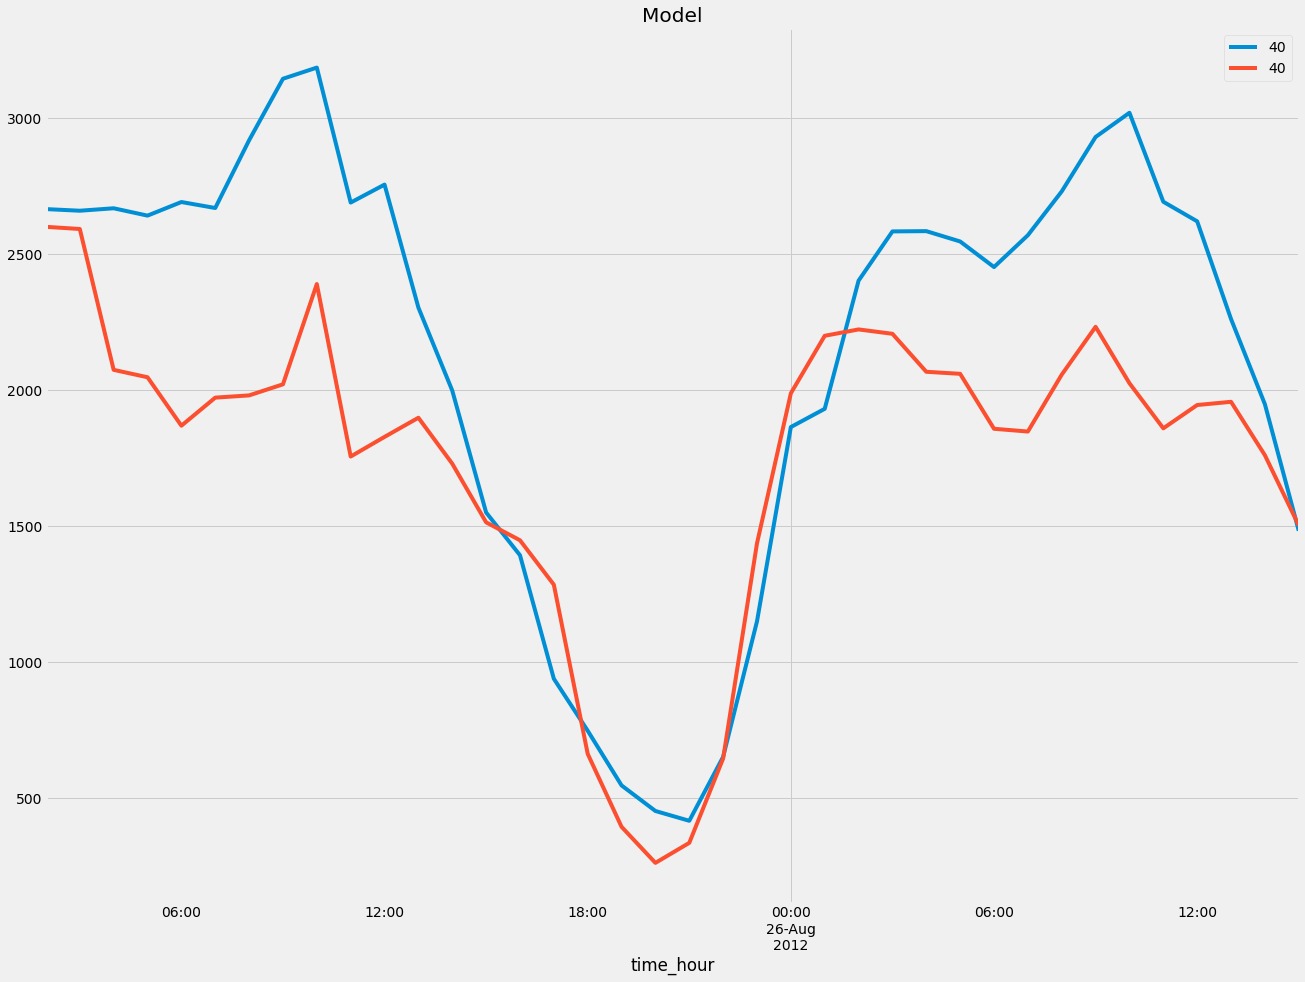

In [36]:
plot_model(lstm_pred, bs)
plot_prediction(lstm_pred, bs)

## Compare LSTM and DCRNN

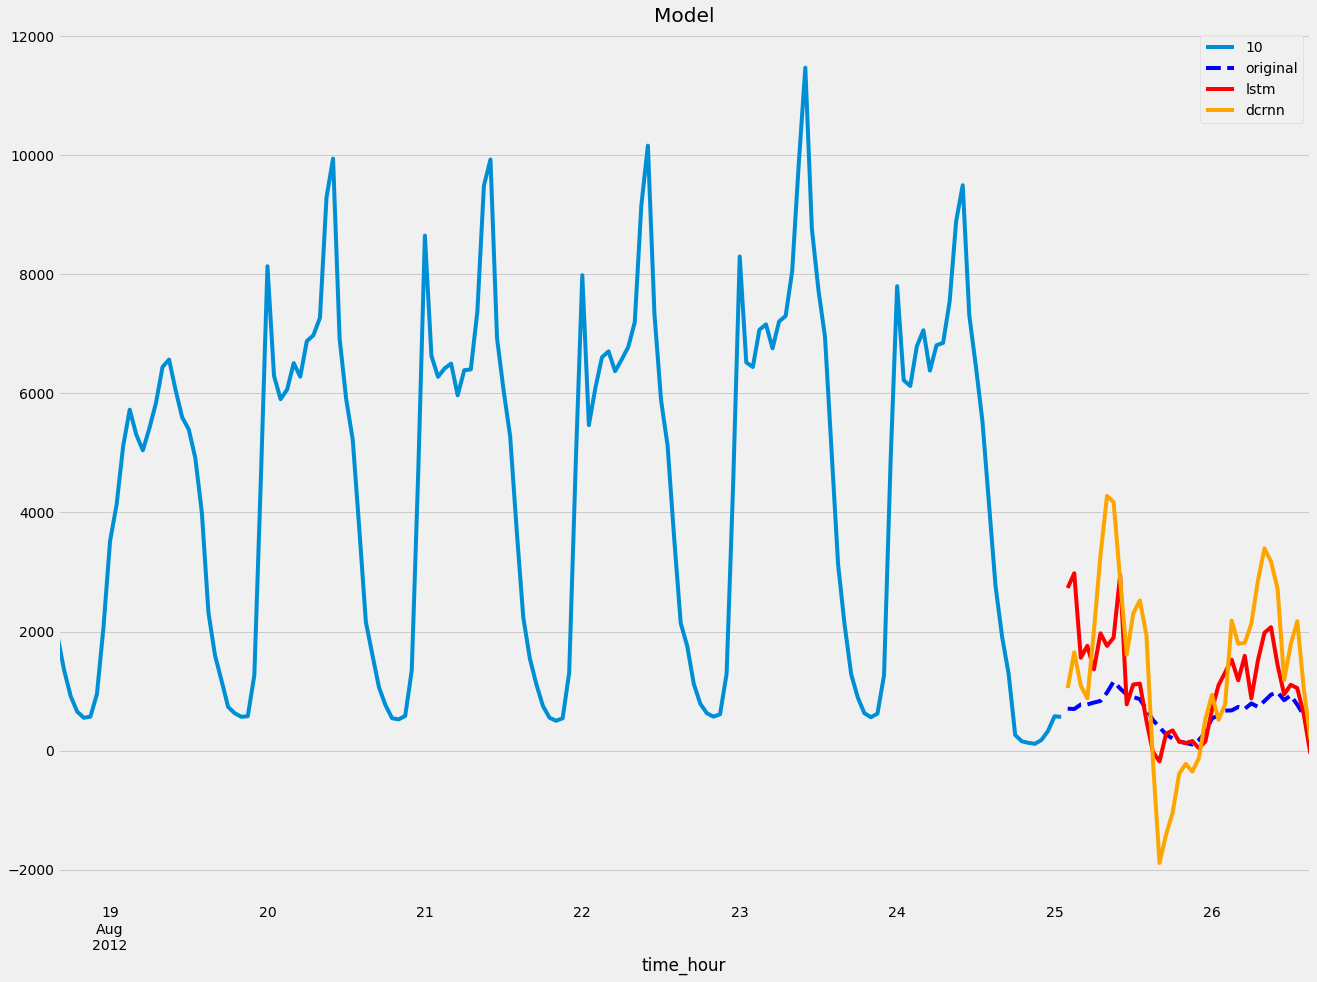

In [64]:
plot_compare_models(lstm_pred, dcrnn_pred1, bs)

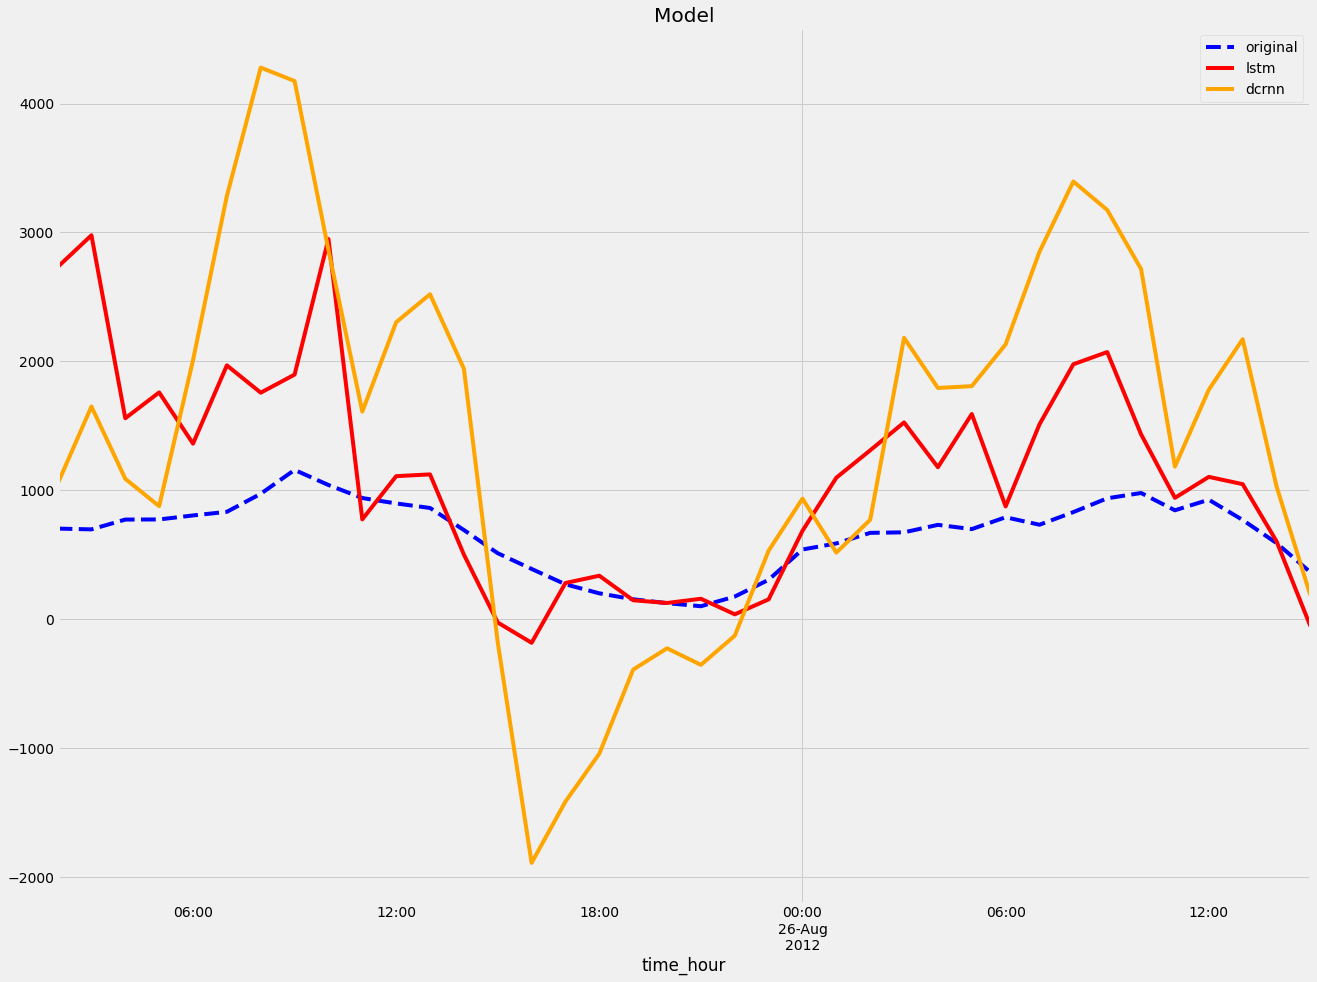

In [65]:
plot_compare_predictions(lstm_pred, dcrnn_pred1, bs)